In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


First i check for missing values and i fill them with 0.

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df = df.fillna(0)

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
#create a new column rooms_per_household
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [7]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

answer: OCEAN

# Question 2
Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [8]:
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [9]:
df[numerical].corr().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000,-0.925,-0.108,0.045,0.068,0.100,0.055,-0.015,-0.028,0.085,0.002
latitude,-0.925,1.000,0.011,-0.036,-0.065,-0.109,-0.071,-0.080,0.106,-0.104,0.002
housing_median_age,-0.108,0.011,1.000,-0.361,-0.317,-0.296,-0.303,-0.119,-0.153,0.125,0.013
total_rooms,0.045,-0.036,-0.361,1.000,0.920,0.857,0.918,0.198,0.134,-0.175,-0.025
total_bedrooms,0.068,-0.065,-0.317,0.920,1.000,0.866,0.967,-0.007,0.003,0.122,-0.028
population,0.100,-0.109,-0.296,0.857,0.866,1.000,0.907,0.005,-0.072,0.031,0.070
households,0.055,-0.071,-0.303,0.918,0.967,0.907,1.000,0.013,-0.081,0.060,-0.027
median_income,-0.015,-0.080,-0.119,0.198,-0.007,0.005,0.013,1.000,0.327,-0.574,0.019
rooms_per_household,-0.028,0.106,-0.153,0.134,0.003,-0.072,-0.081,0.327,1.000,-0.387,-0.005
bedrooms_per_room,0.085,-0.104,0.125,-0.175,0.122,0.031,0.060,-0.574,-0.387,1.000,0.003


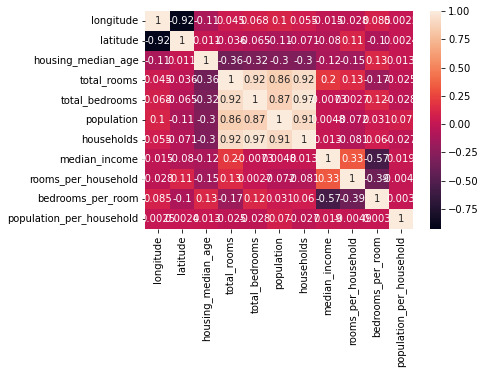

In [10]:
corr = df[numerical].corr()
sns.heatmap(corr, annot=True)
plt.show()

Ans: households and total_bedroom

# Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.


Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [11]:
df['above_average'] = np.where(df['median_house_value'] > df['median_house_value'].mean(), 1,0)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


# Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (median_house_value) is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [17]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

In [18]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639,0
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597,0
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525,1
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714,0


In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
round(mutual_info_score(df_train.above_average, df_train.ocean_proximity),2)

0.1

# Question 4
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [21]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [23]:
#first we convert the dataframe into a dictionary object
train_dict = df_train.to_dict(orient='records')
#then we fit our dictVectorizer by showing it the dictionary
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [25]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [27]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42) 

In [28]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [29]:
y_pred = model.predict_proba(X_val)[:,1]

In [30]:
y_pred = y_pred >= 0.5

In [31]:
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.84

the accuracy is 0.84

# Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?
total_rooms
total_bedrooms
population
households
note: the difference doesn't have to be positive

In [32]:
feat = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [33]:
df_small = df_train[feat].to_dict(orient='records')
X_train_small = dv.fit_transform(df_small)

In [34]:
df_val_small = df_val[feat].to_dict(orient='records')
X_val_small = dv.transform(df_val_small)

In [35]:
model.fit(X_train_small,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [36]:
y_pred = model.predict_proba(X_val_small)[:,1]
y_pred = y_pred >= 0.5
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.71

In [37]:
feat2 = ['total_bedrooms', 'population', 'households']

In [38]:
df_small = df_train[feat2].to_dict(orient='records')
X_train_small = dv.fit_transform(df_small)

In [39]:
df_val_small = df_val[feat2].to_dict(orient='records')
X_val_small = dv.transform(df_val_small)

In [40]:
model.fit(X_train_small,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [41]:
y_pred = model.predict_proba(X_val_small)[:,1]
y_pred = y_pred >= 0.5
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.63

In [42]:
feat3 = ['total_rooms','population', 'households']

In [43]:
df_small = df_train[feat3].to_dict(orient='records')
X_train_small = dv.fit_transform(df_small)

In [44]:
df_val_small = df_val[feat3].to_dict(orient='records')
X_val_small = dv.transform(df_val_small)

In [45]:
model.fit(X_train_small,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [46]:
y_pred = model.predict_proba(X_val_small)[:,1]
y_pred = y_pred >= 0.5
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.66

In [47]:
feat4 = ['total_rooms','total_bedrooms', 'households']

In [48]:
df_small = df_train[feat4].to_dict(orient='records')
X_train_small = dv.fit_transform(df_small)

In [49]:
df_val_small = df_val[feat4].to_dict(orient='records')
X_val_small = dv.transform(df_val_small)

In [50]:
model.fit(X_train_small,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [51]:
y_pred = model.predict_proba(X_val_small)[:,1]
y_pred = y_pred >= 0.5
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.66

In [52]:
feat5 = ['total_rooms','total_bedrooms', 'population']

In [53]:
df_small = df_train[feat5].to_dict(orient='records')
X_train_small = dv.fit_transform(df_small)

In [54]:
df_val_small = df_val[feat5].to_dict(orient='records')
X_val_small = dv.transform(df_val_small)

In [55]:
model.fit(X_train_small,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [56]:
y_pred = model.predict_proba(X_val_small)[:,1]
y_pred = y_pred >= 0.5
#to check for accuracy
round((y_val == y_pred).mean(),2)

0.67

ans: population

# For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [57]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [59]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
#y_test = np.log1p(df_test.median_house_value.values)

In [65]:
#first we convert the dataframe into a dictionary object
train_dict = df_train.to_dict(orient='records')
#then we fit our dictVectorizer by showing it the dictionary
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

array([[1.00000000e+00, 2.59713701e-01, 3.74000000e+02, ...,
        3.92245989e+00, 3.81000000e+02, 1.46700000e+03],
       [1.00000000e+00, 1.30227981e-01, 8.06000000e+02, ...,
        7.56451613e+00, 7.94000000e+02, 6.09700000e+03],
       [0.00000000e+00, 2.34624146e-01, 3.37000000e+02, ...,
        3.90801187e+00, 3.09000000e+02, 1.31700000e+03],
       ...,
       [1.00000000e+00, 1.82879377e-01, 6.02000000e+02, ...,
        5.54983389e+00, 6.11000000e+02, 3.34100000e+03],
       [0.00000000e+00, 2.29126214e-01, 3.50000000e+02, ...,
        4.41428571e+00, 3.54000000e+02, 1.54500000e+03],
       [0.00000000e+00, 2.09574468e-01, 2.15000000e+02, ...,
        4.37209302e+00, 1.97000000e+02, 9.40000000e+02]])

In [67]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [62]:
from sklearn.linear_model import Ridge

In [75]:
rmse_list = []
alphas = [0, 0.01, 0.1, 1, 10]

for i in alphas:
    model = Ridge(alpha=i,solver='sag', random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    #y_pred = y_pred >= 0.5
    #to check for accuracy
    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_val, y_pred, squared = False)
    #accuracy = round((y_val == y_pred).mean(),2)
    rmse_list.append(rmse)
                    
    print(i, rmse)

0 0.17684219911897192
0.01 0.17684219911897192
0.1 0.17684219911903545
1 0.17684219911947785
10 0.1768421991242831


answer = 0.01